In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LinearRegression, Ridge,Lasso #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn import preprocessing

In [23]:
df=pd.read_csv("denemee.csv",index_col=0)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

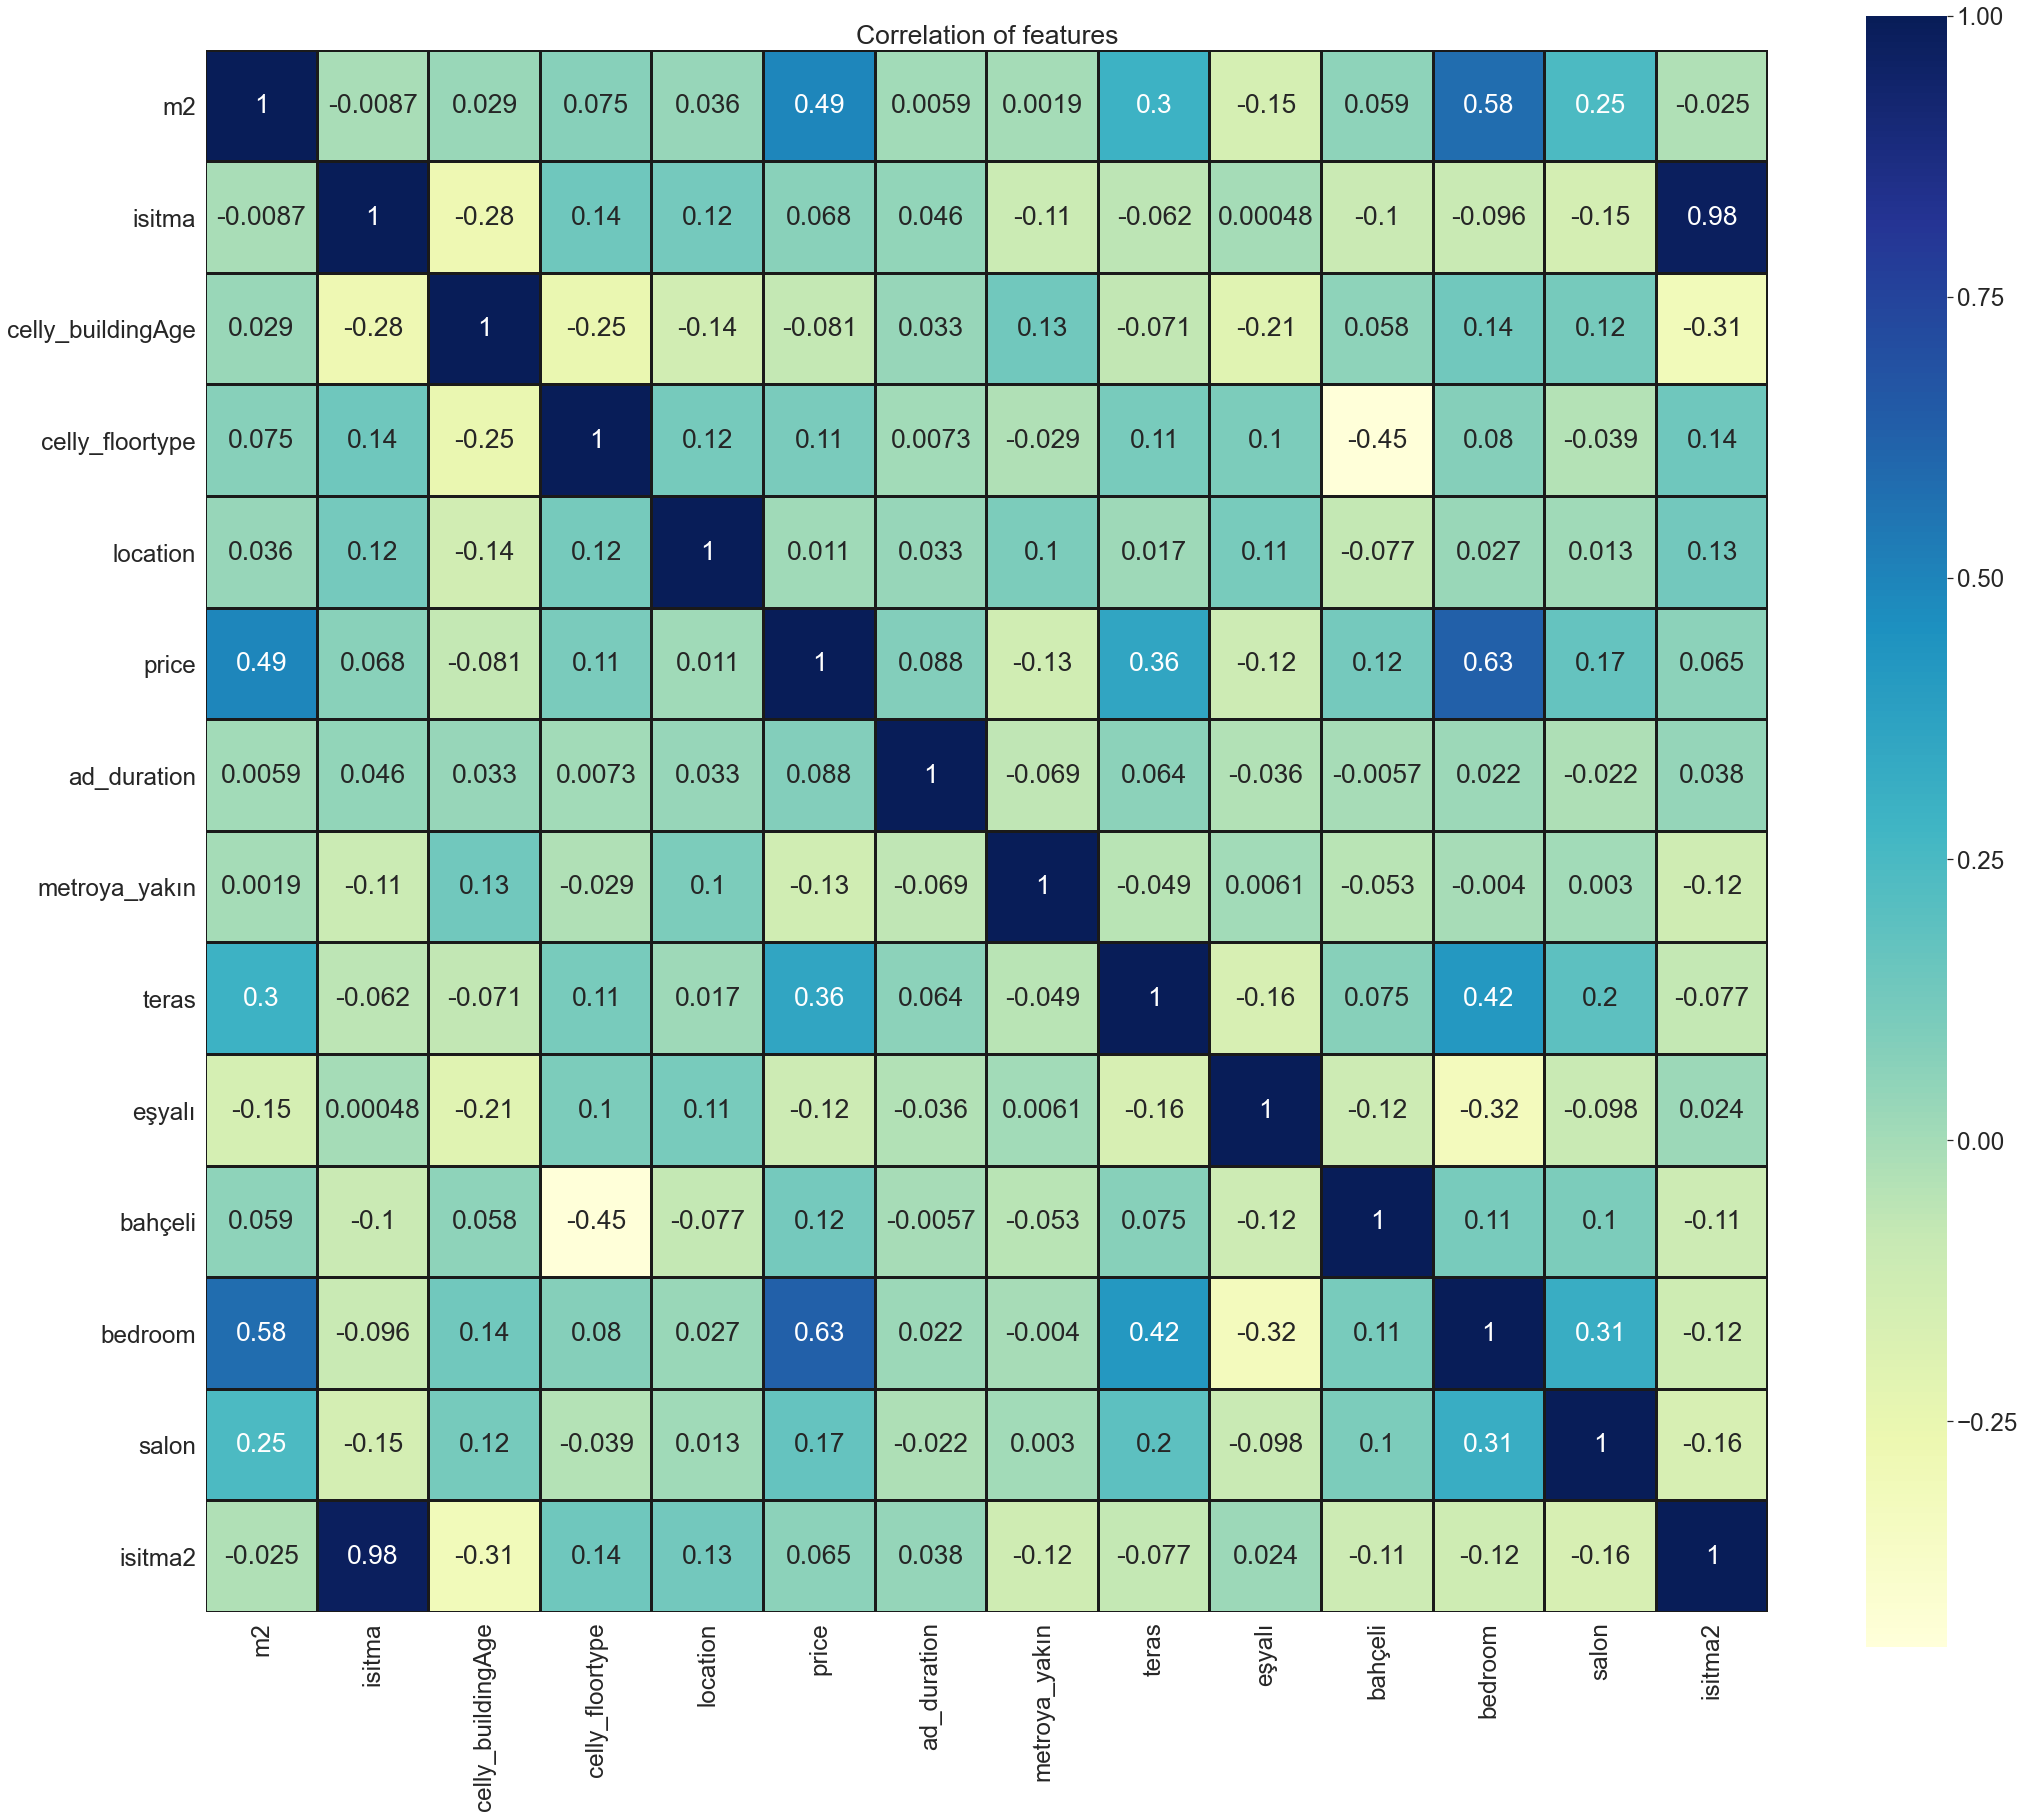

In [1077]:
sns.set(font_scale=2.2)
fig,ax=plt.subplots(figsize=(35,30))
plt.title("Correlation of features")
sns.heatmap(df.corr(),linewidths=2.0,vmax=1.0,square=True,cmap="YlGnBu",linecolor="k",annot=True);
plt.savefig("corr.jpeg",dpi=300,bbox_inches="tight")

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1130
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   m2                 1054 non-null   float64
 1   isitma             1054 non-null   object 
 2   celly_buildingAge  1054 non-null   int64  
 3   celly_floortype    1054 non-null   object 
 4   location           1054 non-null   object 
 5   price              1054 non-null   int64  
 6   ad_duration        1054 non-null   int64  
 7   boğaza_bakan       1054 non-null   int64  
 8   metroya_yakın      1054 non-null   int64  
 9   teras              1054 non-null   int64  
 10  eşyalı             1054 non-null   int64  
 11  bahçeli            1054 non-null   int64  
 12  bedroom            1054 non-null   int64  
 13  salon              1054 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 123.5+ KB


In [47]:
df=df.drop_duplicates() 

In [107]:
num_df=df[list(df.select_dtypes(exclude=["object"]).columns)]

In [108]:
num_df.columns

Index(['m2', 'celly_buildingAge', 'price', 'ad_duration', 'boğaza_bakan',
       'metroya_yakın', 'teras', 'eşyalı', 'bahçeli', 'bedroom', 'salon'],
      dtype='object')

In [109]:
df.groupby("celly_buildingAge").price.mean().sort_values(ascending=False).head()

celly_buildingAge
13    18398.333333
35    15180.555556
38    15000.000000
12    14267.692308
9     13508.333333
Name: price, dtype: float64

This is our first result.Before feature engineering we have <code>m2</code>,<code>bedroom</code>, <code>salon</code>,<code>celly_buildingAge</code>,<code>ad_duration</code>,<code>salon</code> columns.Let's put these features OLS Model.

In [179]:
y,X=np.log(df["price"]),sm.add_constant(df[["m2","bedroom","salon","celly_buildingAge","ad_duration"]])
lm_ols_2=sm.OLS(y,X,data=df)
fit_ols_2=lm_ols_2.fit()
fit_ols_2.summary() # burda const=0 veriyor sm.ad_constan( yapazken ki biaslı bi model oluyor bu.)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     238.5
Date:                Sat, 18 Jul 2020   Prob (F-statistic):          4.46e-170
Time:                        14:43:12   Log-Likelihood:                -913.07
No. Observations:                1054   AIC:                             1838.
Df Residuals:                    1048   BIC:                             1868.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.6673      0.075    101.557      0.000       7.519       7.815
m2                    0.0015      0.000      5.438      0.000       0.001       0.002
bedroom               0.4098      0.018     23.001      0.000       0.375       0.445
salon                 0.0251      0.073      0.342      0.732      -0.119       0.169
celly_buildingAge    -0.0209      0.002    -12.036      0.000      -0.024      -0.017
ad_duration           0.0042      0.002      2.275      0.023       0.001       0.008
==============================================================================
Omnibus:                       22.078   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.440
Skew:                           0.326   Prob(JB):                     8.13e-06
Kurtosis:                       3.331   Cond. No.                         867.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regresyon Modelleri

In [26]:
def split_and_validate(X, y):
    
    # perform train/val split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
#LR    
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    
    # score fit model on validation data
    val_score_lm = lr_model.score(X_val, y_val)
    
# Poly    
    poly = PolynomialFeatures(degree=2) 
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    lm_poly = LinearRegression()
    lm_poly.fit(X_train_poly,y_train)
    
    val_score_poly=lm_poly.score(X_val_poly,y_val)
    

# Ridge    
    ridge_model=Ridge(alpha=0.005,normalize=True)
    ridge_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score_ridge = ridge_model.score(X_val, y_val)    
    
# Lasso    
    lasso_model=Lasso(alpha=0.005,normalize=True)
    lasso_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score_lasso = lasso_model.score(X_val, y_val)    
    
#CV

    kf = KFold(n_splits=10, shuffle=True, random_state = 42)

    
    # report results
    #print('\nValidation R^2 score of linear regression was:', val_score_lm)
    print('\nValidation R^2 score of linear regression was:',np.mean(cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='r2')))
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')
    print("\nTest scores : ",val_score_lm)
        
               
    #print('\nValidation R^2 score of Poly regression was:', val_score_poly)
    print('\nValidation R^2 score of Poly regression was:',np.mean(cross_val_score(lm_poly, X_train_poly, y_train, cv=kf, scoring='r2')))
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lm_poly.coef_):
        print(feature, ':', f'{coef:.2f}') 
    print("\nTest scores : ",val_score_poly)
    print("\nTrain scores :",lm_poly.score(X_train_poly,y_train))
        
    #print('\nValidation R^2 score of Ridge regression was:', val_score_ridge)
    print('\nValidation R^2 score of Ridge regression was:',np.mean(cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring='r2')))
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, ridge_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
    print("\nTest scores : ",val_score_ridge)

    #print('\nValidation R^2 score of Lasso regression was:', val_score_lasso)
    print('\nValidation R^2 score of lasso regression was:',np.mean(cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring='r2')))
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lasso_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
    print("\nTest scores : ",val_score_lasso)
        

In [180]:
y,X=np.log(df["price"]),df[["m2","bedroom","celly_buildingAge"]]
split_and_validate(X,y)


Validation R^2 score of linear regression was: 0.5162312086497446
Feature coefficient results: 

m2 : 0.00
bedroom : 0.41
celly_buildingAge : -0.02

Test scores :  0.518078143658144

Validation R^2 score of Poly regression was: 0.5711051097995883
Feature coefficient results: 

m2 : 0.00
bedroom : 0.01
celly_buildingAge : 0.16

Test scores :  0.575667132261684

Train scores : 0.5940835553684886

Validation R^2 score of Ridge regression was: 0.5163185624682616
Feature coefficient results: 

m2 : 0.00
bedroom : 0.41
celly_buildingAge : -0.02

Test scores :  0.5181407809490424

Validation R^2 score of lasso regression was: 0.44784822199618
Feature coefficient results: 

m2 : 0.00
bedroom : 0.32
celly_buildingAge : -0.00

Test scores :  0.43807510584180487


In [525]:
num_df.columns

Index(['m2', 'celly_buildingAge', 'price', 'ad_duration', 'metroya_yakın',
       'teras', 'eşyalı', 'bahçeli', 'bedroom', 'salon'],
      dtype='object')

In [181]:
y,X=np.log(df["price"]),df[["m2","bedroom","celly_buildingAge","metroya_yakın","teras","eşyalı"]]
split_and_validate(X,y)


Validation R^2 score of linear regression was: 0.5553510151862135
Feature coefficient results: 

m2 : 0.00
bedroom : 0.41
celly_buildingAge : -0.02
metroya_yakın : -0.53
teras : 0.20
eşyalı : 0.29

Test scores :  0.5053581809085634

Validation R^2 score of Poly regression was: 0.5940929560178592
Feature coefficient results: 

m2 : -0.00
bedroom : 0.01
celly_buildingAge : 0.22
metroya_yakın : -0.06
teras : -0.34
eşyalı : 0.27

Test scores :  0.5727149231026268

Train scores : 0.632775533606597

Validation R^2 score of Ridge regression was: 0.5554502736439118
Feature coefficient results: 

m2 : 0.00
bedroom : 0.41
celly_buildingAge : -0.01
metroya_yakın : -0.53
teras : 0.20
eşyalı : 0.29

Test scores :  0.5054492521479805

Validation R^2 score of lasso regression was: 0.44857372891890046
Feature coefficient results: 

m2 : 0.00
bedroom : 0.32
celly_buildingAge : -0.00
metroya_yakın : -0.00
teras : 0.01
eşyalı : 0.00

Test scores :  0.43809635507060884


# Şimdi Kategorik Değişkenleri de Katalım

# Dummy

In [9]:
cat_col=["celly_floortype","isitma","location"]

In [27]:
df=pd.concat([pd.get_dummies(df[cat_col]),df],axis=1) 
df=df.drop(columns=cat_col)

In [11]:
df.columns

Index(['celly_floortype_1. Kat', 'celly_floortype_Ara Kat',
       'celly_floortype_Bodrum', 'celly_floortype_Çatı Katı',
       'isitma_Belirtilmemiş', 'isitma_Kat Kaloriferi', 'isitma_Klima',
       'isitma_Kombi', 'isitma_Merkezi', 'isitma_Merkezi (Pay Ölçer)',
       'isitma_Soba', 'location_Sarıyer,Ayazağa Mahallesi',
       'location_Sarıyer,Bahçeköy Merkez Mahallesi',
       'location_Sarıyer,Bahçeköy Yeni Mahallesi',
       'location_Sarıyer,Baltalimanı Mahallesi',
       'location_Sarıyer,Büyükdere Mahallesi',
       'location_Sarıyer,Cumhuriyet Mahallesi',
       'location_Sarıyer,Darüşşafaka Mahallesi',
       'location_Sarıyer,Emirgan Mahallesi',
       'location_Sarıyer,Fatih Sultan Mehmet Mahallesi',
       'location_Sarıyer,Ferahevler Mahallesi',
       'location_Sarıyer,Huzur Mahallesi',
       'location_Sarıyer,Kireçburnu Mahallesi',
       'location_Sarıyer,Kumköy Mahallesi', 'location_Sarıyer,Maden Mahallesi',
       'location_Sarıyer,Maslak Mahallesi',
       'locat

## 2 Kategorik Değişkenle ilgilendik modele sokalım.

In [14]:
y,X=np.log(df["price"]),df.drop(columns="price")
split_and_validate(X,y)


Validation R^2 score of linear regression was: 0.6862668593320638
Feature coefficient results: 

celly_floortype_1. Kat : -0.07
celly_floortype_Ara Kat : 0.10
celly_floortype_Bodrum : -0.24
celly_floortype_Çatı Katı : 0.21
isitma_Belirtilmemiş : 0.56
isitma_Kat Kaloriferi : -0.14
isitma_Klima : 0.04
isitma_Kombi : -0.07
isitma_Merkezi : 0.29
isitma_Merkezi (Pay Ölçer) : 0.12
isitma_Soba : -0.81
location_Sarıyer,Ayazağa Mahallesi : -0.20
location_Sarıyer,Bahçeköy Merkez Mahallesi : -0.81
location_Sarıyer,Bahçeköy Yeni Mahallesi : -0.34
location_Sarıyer,Baltalimanı Mahallesi : 0.42
location_Sarıyer,Büyükdere Mahallesi : -0.25
location_Sarıyer,Cumhuriyet Mahallesi : -0.14
location_Sarıyer,Darüşşafaka Mahallesi : 0.13
location_Sarıyer,Emirgan Mahallesi : 0.55
location_Sarıyer,Fatih Sultan Mehmet Mahallesi : -0.38
location_Sarıyer,Ferahevler Mahallesi : 0.04
location_Sarıyer,Huzur Mahallesi : 0.05
location_Sarıyer,Kireçburnu Mahallesi : -0.14
location_Sarıyer,Kumköy Mahallesi : -0.46
locat

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1130
Data columns (total 49 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   celly_floortype_1. Kat                          1093 non-null   uint8  
 1   celly_floortype_Ara Kat                         1093 non-null   uint8  
 2   celly_floortype_Bodrum                          1093 non-null   uint8  
 3   celly_floortype_Çatı Katı                       1093 non-null   uint8  
 4   isitma_Belirtilmemiş                            1093 non-null   uint8  
 5   isitma_Kat Kaloriferi                           1093 non-null   uint8  
 6   isitma_Klima                                    1093 non-null   uint8  
 7   isitma_Kombi                                    1093 non-null   uint8  
 8   isitma_Merkezi                                  1093 non-null   uint8  
 9   isitma_Merkezi (Pay Ölçer)               

In [28]:
df=df.drop_duplicates()

In [17]:
y,X=np.log(df["price"]),df.drop(columns="price")
split_and_validate(X,y)


Validation R^2 score of linear regression was: 0.6882312555795049
Feature coefficient results: 

celly_floortype_1. Kat : -0.07
celly_floortype_Ara Kat : 0.10
celly_floortype_Bodrum : -0.23
celly_floortype_Çatı Katı : 0.20
isitma_Belirtilmemiş : 0.59
isitma_Kat Kaloriferi : -0.19
isitma_Klima : 0.06
isitma_Kombi : -0.06
isitma_Merkezi : 0.32
isitma_Merkezi (Pay Ölçer) : 0.12
isitma_Soba : -0.84
location_Sarıyer,Ayazağa Mahallesi : -0.22
location_Sarıyer,Bahçeköy Merkez Mahallesi : -0.00
location_Sarıyer,Bahçeköy Yeni Mahallesi : -0.39
location_Sarıyer,Baltalimanı Mahallesi : 0.48
location_Sarıyer,Büyükdere Mahallesi : -0.17
location_Sarıyer,Cumhuriyet Mahallesi : -0.20
location_Sarıyer,Darüşşafaka Mahallesi : 0.05
location_Sarıyer,Emirgan Mahallesi : 0.50
location_Sarıyer,Fatih Sultan Mehmet Mahallesi : -0.45
location_Sarıyer,Ferahevler Mahallesi : -0.05
location_Sarıyer,Huzur Mahallesi : 0.04
location_Sarıyer,Kireçburnu Mahallesi : -0.21
location_Sarıyer,Kumköy Mahallesi : -0.40
loca

In [18]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1130
Data columns (total 49 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   celly_floortype_1. Kat                          1054 non-null   uint8  
 1   celly_floortype_Ara Kat                         1054 non-null   uint8  
 2   celly_floortype_Bodrum                          1054 non-null   uint8  
 3   celly_floortype_Çatı Katı                       1054 non-null   uint8  
 4   isitma_Belirtilmemiş                            1054 non-null   uint8  
 5   isitma_Kat Kaloriferi                           1054 non-null   uint8  
 6   isitma_Klima                                    1054 non-null   uint8  
 7   isitma_Kombi                                    1054 non-null   uint8  
 8   isitma_Merkezi                                  1054 non-null   uint8  
 9   isitma_Merkezi (Pay Ölçer)               

In [32]:
y,X=np.log(df["price"]),df.drop(columns=["price","ad_duration","salon","celly_floortype_Bodrum","isitma_Kat Kaloriferi"])
split_and_validate(X,y)
# 0.6888007124335644
# 0.6886199500904955


Validation R^2 score of linear regression was: 0.6888007124335644
Feature coefficient results: 

celly_floortype_1. Kat : 0.16
celly_floortype_Ara Kat : 0.34
celly_floortype_Çatı Katı : 0.44
isitma_Belirtilmemiş : 0.76
isitma_Klima : 0.24
isitma_Kombi : 0.12
isitma_Merkezi : 0.50
isitma_Merkezi (Pay Ölçer) : 0.31
isitma_Soba : -0.67
location_Sarıyer,Ayazağa Mahallesi : -0.23
location_Sarıyer,Bahçeköy Merkez Mahallesi : -0.00
location_Sarıyer,Bahçeköy Yeni Mahallesi : -0.39
location_Sarıyer,Baltalimanı Mahallesi : 0.50
location_Sarıyer,Büyükdere Mahallesi : -0.16
location_Sarıyer,Cumhuriyet Mahallesi : -0.21
location_Sarıyer,Darüşşafaka Mahallesi : 0.04
location_Sarıyer,Emirgan Mahallesi : 0.50
location_Sarıyer,Fatih Sultan Mehmet Mahallesi : -0.46
location_Sarıyer,Ferahevler Mahallesi : -0.05
location_Sarıyer,Huzur Mahallesi : 0.04
location_Sarıyer,Kireçburnu Mahallesi : -0.22
location_Sarıyer,Kumköy Mahallesi : -0.39
location_Sarıyer,Maden Mahallesi : -0.14
location_Sarıyer,Maslak Ma

In [30]:
df=df.drop_duplicates() 

In [33]:
y,X=np.log(df["price"]),df.drop(columns=["price","ad_duration","salon","celly_floortype_Bodrum","isitma_Kat Kaloriferi"])
lm_ols_2=sm.OLS(y,sm.add_constant(X),data=df)
fit_ols_2=lm_ols_2.fit()
fit_ols_2.summary() # "m2","bedroom","celly_buildingAge","teras","eşyalı"

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     59.98
Date:                Sun, 02 Aug 2020   Prob (F-statistic):          3.37e-245
Time:                        01:45:18   Log-Likelihood:                -645.22
No. Observations:                1054   AIC:                             1378.
Df Residuals:                    1010   BIC:                             1597.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              6.6449      0.282     23.532      0.000       6.091       7.199
celly_floortype_1. Kat                             0.0942      0.099      0.952      0.342      -0.100       0.289
celly_floortype_Ara Kat                            0.2514      0.096      2.632      0.009       0.064       0.439
celly_floortype_Çatı Katı                          0.3617      0.104      3.474      0.001       0.157       0.566
isitma_Belirtilmemiş                               0.9087      0.380      2.390      0.017       0.162       1.655
isitma_Klima                                       0.4263      0.292      1.460      0.145      -0.147       0.999
isitma_Kombi                                       0.2836      0.272      1.044      0.297      -0.249       0.817
isitma_Merkezi                                     0.6493      0.274      2.369      0.018       0.111       1.187
isitma_Merkezi (Pay Ölçer)                         0.4736      0.274      1.729      0.084      -0.064       1.011
isitma_Soba                                       -0.4828      0.323     -1.493      0.136      -1.118       0.152
location_Sarıyer,Ayazağa Mahallesi                 0.0566      0.071      0.797      0.426      -0.083       0.196
location_Sarıyer,Bahçeköy Merkez Mahallesi        -0.5823      0.443     -1.316      0.189      -1.451       0.286
location_Sarıyer,Bahçeköy Yeni Mahallesi          -0.1596      0.316     -0.506      0.613      -0.779       0.460
location_Sarıyer,Baltalimanı Mahallesi             0.8401      0.164      5.126      0.000       0.518       1.162
location_Sarıyer,Büyükdere Mahallesi               0.1661      0.161      1.030      0.303      -0.150       0.483
location_Sarıyer,Cumhuriyet Mahallesi              0.1238      0.112      1.104      0.270      -0.096       0.344
location_Sarıyer,Darüşşafaka Mahallesi             0.3127      0.106      2.946      0.003       0.104       0.521
location_Sarıyer,Emirgan Mahallesi                 0.8073      0.072     11.248      0.000       0.666       0.948
location_Sarıyer,Fatih Sultan Mehmet Mahallesi    -0.2014      0.172     -1.173      0.241      -0.538       0.136
location_Sarıyer,Ferahevler Mahallesi              0.2618      0.090      2.925      0.004       0.086       0.437
location_Sarıyer,Huzur Mahallesi                   0.2963      0.096      3.090      0.002       0.108       0.485
location_Sarıyer,Kireçburnu Mahallesi              0.0545      0.123      0.442      0.659      -0.188       0.297
location_Sarıyer,Kumköy Mahallesi                 -0.1996      0.201     -0.994      0.321      -0.594       0.195
location_Sarıyer,Maden Mahallesi                   0.0703      0.092      0.762      0.446   

In [ ]:
# Lineer Regression Assumptions

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#LR    
    
    # fit linear regression to training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
    
    
    # score fit model on validation data
val_score_lm = lr_model.score(X_test, y_test)
val_score_lm

0.6531005460590172

In [37]:
data=pd.DataFrame()
import scipy.stats as stats

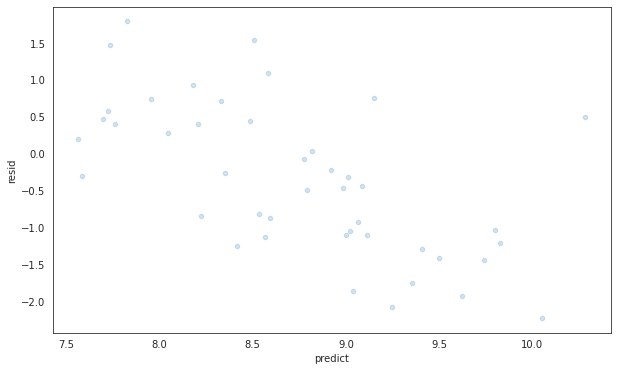

In [41]:
# 1. Veri normal dağılımdan gelir.
# 2. Hatalar normal dağılır.
# 3. Hataların varyansı sabit olmalı
# 4.Hatalar ve gözlemler arası korelasyon olmamalı
# 5. Bağımsız değişkenler arasında korelasyon olmamalı => Cond. No yüksek yani multicoll. var. X

with sns.axes_style('white'):
    plot=data.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))

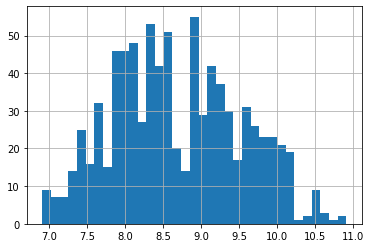

In [42]:
y_train.hist(bins=35) # Bağımlı değişkenin dağılımı

In [54]:
# Hatalar-gözlemler arası korelasyon olmamalı

pd.concat([data["resid"],X],axis=1).corr()["resid"].sort_values(ascending=False).head(5)

resid                                 1.000000
m2                                    0.469133
bedroom                               0.372081
teras                                 0.291392
location_Sarıyer,Tarabya Mahallesi    0.239497
Name: resid, dtype: float64

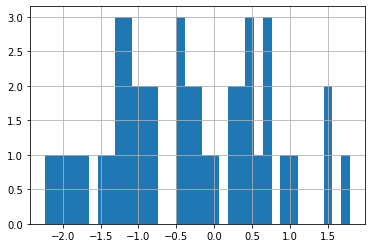

In [52]:
data["resid"].hist(bins=35) # Hatanın dağılımı

C:\Users\PACKERDBELL\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


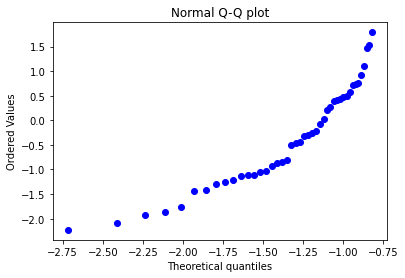

In [38]:
data['predict']=lr_model.predict(X_test)
data['resid']=y_test-data.predict

stats.probplot(data['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

 Veri normal dağılmıyor grafikte gördüğümüz gibi.Lineer regresyon varsayımları çöktü.OLS'de Cond No. da yüksek.Ridge bizim modelimiz

# FINAL MODEL

In [84]:
y,X=np.log(df["price"]),df.drop(columns=["price","ad_duration","salon","celly_floortype_Bodrum","isitma_Kat Kaloriferi"])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
r=Ridge(alpha=0.000001,normalize=True)
r.fit(X_train, y_train)
    

test = r.score(X_val, y_val)    
test    

0.6509496649484809